# Group Project 1

## Death rates for suicide, by sex, race, Hispanic origin, and age: United States

### Load and Inspect the Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = "Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

# Preview the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6390 non-null   object 
 1   UNIT            6390 non-null   object 
 2   UNIT_NUM        6390 non-null   int64  
 3   STUB_NAME       6390 non-null   object 
 4   STUB_NAME_NUM   6390 non-null   int64  
 5   STUB_LABEL      6390 non-null   object 
 6   STUB_LABEL_NUM  6390 non-null   float64
 7   YEAR            6390 non-null   int64  
 8   YEAR_NUM        6390 non-null   int64  
 9   AGE             6390 non-null   object 
 10  AGE_NUM         6390 non-null   float64
 11  ESTIMATE        5484 non-null   float64
 12  FLAG            906 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 649.1+ KB


,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


### Drop Unnecessary Columns

In [3]:
# Dropping redundant numerical columns that duplicate categorical information
columns_to_drop = ['INDICATOR', 'UNIT', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM']
df_cleaned = df.drop(columns=columns_to_drop)

# Renaming columns for clarity
df_cleaned.rename(columns={
    'STUB_NAME': 'Category',
    'STUB_LABEL': 'Subcategory',
    'ESTIMATE': 'Suicide_Rate'
}, inplace=True)

# Display updated structure
df_cleaned.info()
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      6390 non-null   object 
 1   Subcategory   6390 non-null   object 
 2   YEAR          6390 non-null   int64  
 3   AGE           6390 non-null   object 
 4   Suicide_Rate  5484 non-null   float64
 5   FLAG          906 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 299.7+ KB


,Category,Subcategory,YEAR,AGE,Suicide_Rate,FLAG
0,Total,All persons,1950,All ages,13.2,NaN
1,Total,All persons,1960,All ages,12.5,NaN
2,Total,All persons,1970,All ages,13.1,NaN
3,Total,All persons,1980,All ages,12.2,NaN
4,Total,All persons,1981,All ages,12.3,NaN


### Handle Missing Values

In [4]:
# Check missing values
df_cleaned.isnull().sum()

# Handling missing values in Suicide_Rate (either remove or fill)
df_cleaned.dropna(subset=['Suicide_Rate'], inplace=True)  # Option 1: Remove rows with missing rates
# df_cleaned['Suicide_Rate'].fillna(df_cleaned['Suicide_Rate'].median(), inplace=True)  # Option 2: Fill with median

# Verify missing values are handled
df_cleaned.isnull().sum()


Category           0
Subcategory        0
YEAR               0
AGE                0
Suicide_Rate       0
FLAG            5484
dtype: int64

### Summary Statistics

In [5]:
# Get descriptive statistics
df_cleaned.describe()


,YEAR,Suicide_Rate
count,5484.000000,5484.000000
mean,1999.677972,13.709810
std,13.584097,11.531805
min,1950.000000,0.300000
25%,1991.000000,5.000000
50%,2002.000000,10.500000
75%,2010.000000,19.500000
max,2018.000000,74.800000


### Trend Analysis - Suicide Rates Over Time

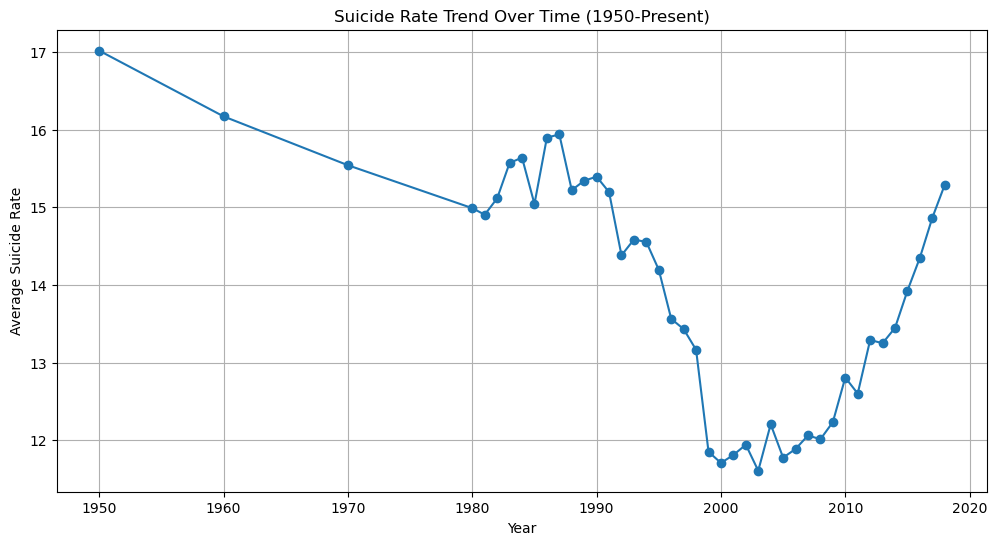

In [6]:
import matplotlib.pyplot as plt

# Aggregate data by year
yearly_trend = df_cleaned.groupby('YEAR')['Suicide_Rate'].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Average Suicide Rate")
plt.title("Suicide Rate Trend Over Time (1950-Present)")
plt.grid(True)
plt.show()

###  Suicide Rate by Age Group

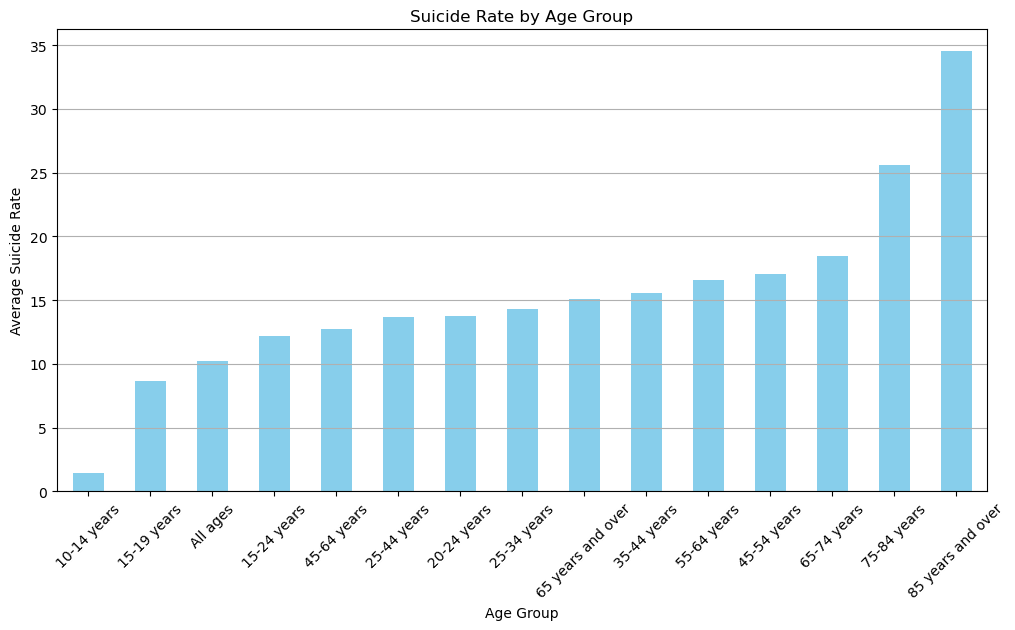

In [7]:
# Aggregate data by age group
age_trend = df_cleaned.groupby('AGE')['Suicide_Rate'].mean().sort_values()

# Plot
plt.figure(figsize=(12, 6))
age_trend.plot(kind='bar', color='skyblue')
plt.xlabel("Age Group")
plt.ylabel("Average Suicide Rate")
plt.title("Suicide Rate by Age Group")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Suicide Rate by Gender

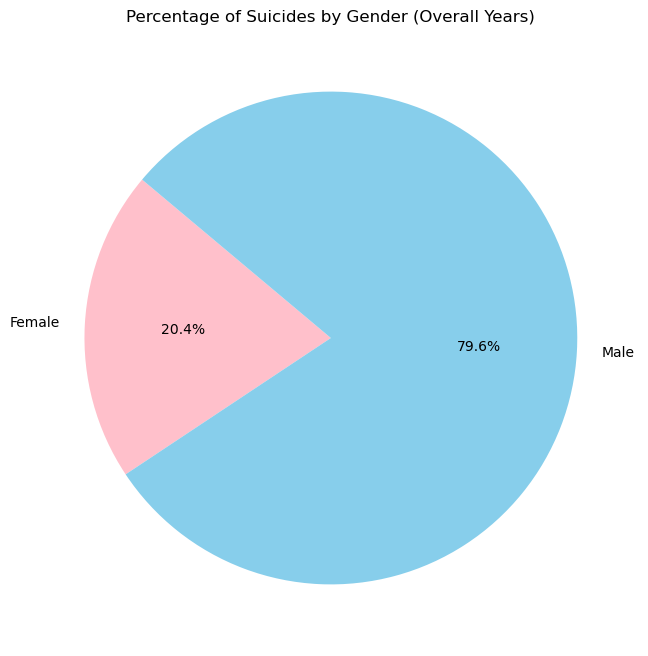

In [9]:
Pie chart of suicides by gender
# Aggregate suicide data by gender
gender_data = df[df["STUB_LABEL"].isin(["Male", "Female"])].groupby("STUB_LABEL")["ESTIMATE"].sum()

# Define colors: Sky blue for Male, Baby pink for Female
colors = ["pink", "skyblue"] 

# Plot
plt.figure(figsize=(8, 8))
plt.pie(gender_data, labels=gender_data.index, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Percentage of Suicides by Gender (Overall Years)")
plt.show()

### Suicide Rate by Race/Ethnicity

In [10]:
# Save cleaned dataset for further analysis
df_cleaned.to_csv("Cleaned_Suicide_Rates.csv", index=False)


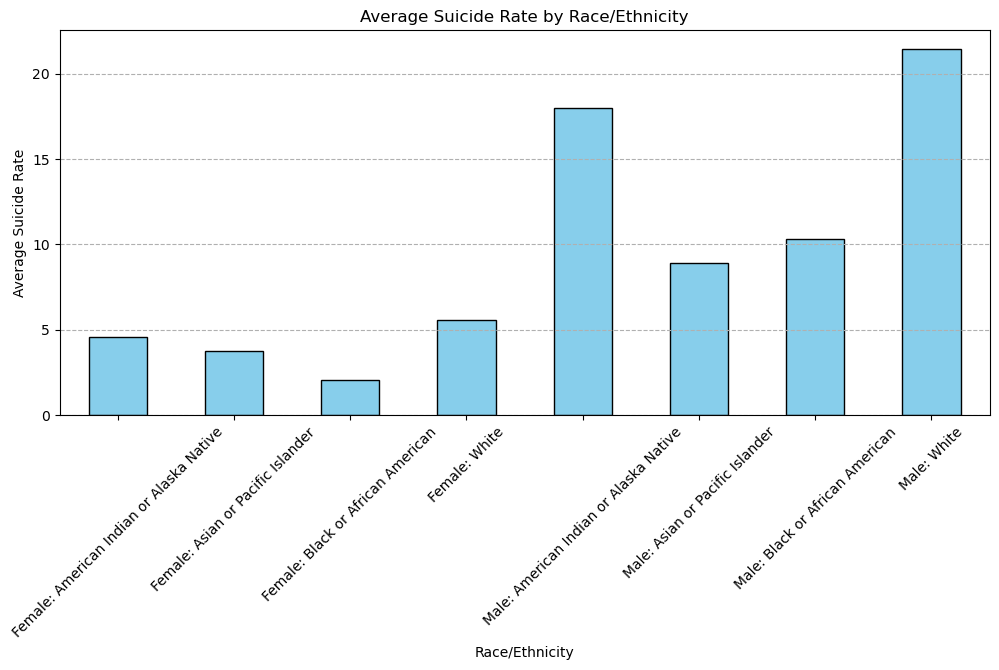

In [11]:
race_filtered = df_cleaned[df_cleaned['Category'] == 'Sex and race'].groupby('Subcategory')['Suicide_Rate'].mean()

if not race_filtered.empty:
    plt.figure(figsize=(12, 5))
    race_filtered.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel("Race/Ethnicity")
    plt.ylabel("Average Suicide Rate")
    plt.title("Average Suicide Rate by Race/Ethnicity")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.show()
else:
    print("No sufficient data available for race-based suicide rate visualization.")

## Advanced Analysis
## Correlation Analysis (Suicide Rate & Age)

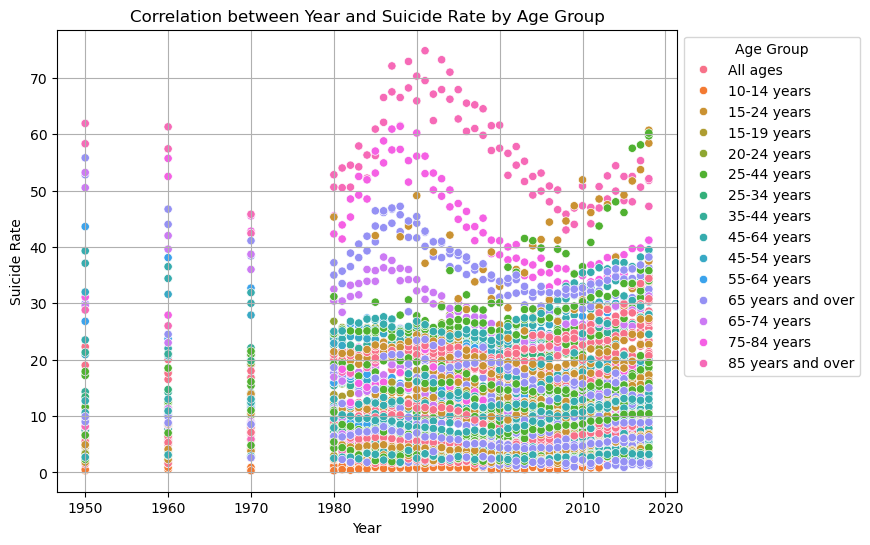

In [12]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x="YEAR", y="Suicide_Rate", hue="AGE")
plt.xlabel("Year")
plt.ylabel("Suicide Rate")
plt.title("Correlation between Year and Suicide Rate by Age Group")
plt.legend(title="Age Group", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


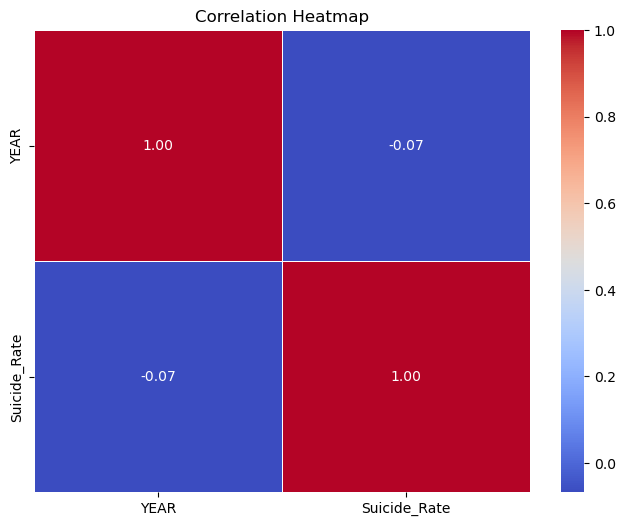

In [13]:
import seaborn as sns

numerical_data = df_cleaned.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
from scipy import stats

male_rates = df_cleaned[(df_cleaned['Category'] == 'Sex') & (df_cleaned['Subcategory'] == 'Male')]['Suicide_Rate']
female_rates = df_cleaned[(df_cleaned['Category'] == 'Sex') & (df_cleaned['Subcategory'] == 'Female')]['Suicide_Rate']

t_stat, p_value = stats.ttest_ind(male_rates, female_rates, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2e}")

if p_value < 0.05:
    print("Significant difference found between male and female suicide rates.")
else:
    print("No significant difference found between male and female suicide rates.")

T-statistic: 81.46
P-value: 4.88e-107
Significant difference found between male and female suicide rates.
